In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
%matplotlib inline

Evolved a filter using Genetic Programming - Looks good but is really slow in Python - any ideas of how I can speed it up?
2000000 rows takes about 12 minutes.  **Any tensorflow gpu experts out there?**
Edit - decimated signal to improve performance

In [5]:
train = pd.read_csv('../input/train.csv', dtype={'acoustic_data': np.float32, 'time_to_failure': np.float32},nrows=6000000)
train.acoustic_data = np.sign(train.acoustic_data)*np.log1p(np.abs(train.acoustic_data))

In [6]:
def myfilter(data):
    return (0.100000*np.tanh(((data[99]) * (((np.cos((data[5]))) + (((((((data[99]) + (np.cos((data[70]))))) + (np.cos((data[58]))))) * 2.0)))))) +
            0.100000*np.tanh(((np.cos(((((((((((data[18]) + (data[60]))/2.0)) + ((((data[74]) + (data[22]))/2.0)))/2.0)) + ((((data[41]) + (data[2]))/2.0)))/2.0)))) * 2.0)) +
            0.096209*np.tanh(np.tanh(((((((data[99]) + (((data[99]) - (((data[62]) + (((data[32]) - (((data[99]) - (data[85]))))))))))/2.0)) / 2.0)))) +
            0.100000*np.tanh(((data[99]) * (((np.cos(((((data[93]) + (data[14]))/2.0)))) * (((np.cos((data[46]))) * (np.cos((data[46]))))))))) +
            0.086870*np.tanh((((-1.0*((((data[95]) - (data[41])))))) * (((((np.cos(((((np.tanh((data[34]))) + (data[95]))/2.0)))) / 2.0)) / 2.0)))) +
            0.099883*np.tanh(((np.cos((data[0]))) * (((np.cos((data[20]))) * (((1.0) - (data[20]))))))) +
            0.100000*np.tanh(((data[1]) * (((((((np.cos((data[0]))) * (np.tanh((np.tanh((((data[96]) - (data[0]))))))))) / 2.0)) * (data[1]))))) +
            0.083744*np.tanh((((((-1.0*((((np.tanh((((data[62]) / 2.0)))) * (((data[62]) * (((data[63]) * (np.cos((data[62])))))))))))) / 2.0)) / 2.0)) +
            0.099844*np.tanh(((((data[2]) * ((((((((data[2]) - (data[4]))) + (((((data[32]) - (data[52]))) / 2.0)))/2.0)) / 2.0)))) / 2.0)) +
            0.099687*np.tanh(((((-1.0) + (np.cos((np.sin((((data[81]) - (data[96]))))))))) * (((np.cos((data[86]))) - (data[96]))))) +
            0.091950*np.tanh(np.tanh(((((((((data[99]) - (data[90]))) * (((((data[99]) - (data[90]))) * (data[99]))))) + (np.sin((-3.0))))/2.0)))) +
            0.099922*np.tanh((((((((((data[95]) + ((-1.0*((data[0])))))/2.0)) * (((((((-1.0*((data[30])))) + (data[2]))) + (data[0]))/2.0)))) / 2.0)) / 2.0)) +
            0.099844*np.tanh(((np.cos((data[39]))) * (((np.cos((data[39]))) * ((((data[39]) + (np.sin((((np.cos((data[39]))) - (data[64]))))))/2.0)))))) +
            0.099922*np.tanh((((((-1.0*(((((((data[67]) + ((((3.16687417030334473)) / 2.0)))/2.0)) - (data[99])))))) * (np.cos((data[67]))))) / 2.0)) +
            0.099453*np.tanh(((((((((-1.0*((np.cos((data[74])))))) + (data[74]))/2.0)) * (((data[74]) * ((((-1.0*((np.cos((data[74])))))) / 2.0)))))) / 2.0)) +
            0.099492*np.tanh(((((((((((np.sin((((data[36]) * 2.0)))) / 2.0)) / 2.0)) / 2.0)) / 2.0)) / 2.0)) +
            0.091208*np.tanh(((((np.cos((data[27]))) / 2.0)) * (((data[27]) * (((data[22]) - (data[27]))))))) +
            0.099687*np.tanh((((((((data[98]) + (-1.0))/2.0)) * (np.cos((((np.cos((((data[15]) * 2.0)))) * 2.0)))))) / 2.0)) +
            0.085658*np.tanh(((np.sin(((((-1.0*((((data[30]) - (data[32])))))) * (((data[32]) * ((-1.0*((((data[30]) - (data[32])))))))))))) / 2.0)) +
            0.086440*np.tanh(((((np.tanh((np.tanh((np.sin((np.cos((data[34]))))))))) * ((-1.0*((np.tanh((np.sin((((np.cos((data[99]))) * 2.0))))))))))) / 2.0)) +
            0.099570*np.tanh(((((data[39]) - (np.sin((data[61]))))) * (((((((np.sin((data[60]))) - (np.tanh((data[96]))))) / 2.0)) / 2.0)))) +
            0.099805*np.tanh(((((data[17]) - (data[55]))) * (((((((((np.sin((data[56]))) / 2.0)) / 2.0)) / 2.0)) / 2.0)))) +
            0.099609*np.tanh((((((data[70]) + ((-1.0*((data[68])))))/2.0)) * (((data[70]) * (((data[51]) * ((((data[70]) + ((-1.0*((data[68])))))/2.0)))))))) +
            0.075655*np.tanh(((((((np.sin((((np.sin(((-1.0*((((np.sin((np.sin((data[23]))))) / 2.0))))))) / 2.0)))) / 2.0)) / 2.0)) / 2.0)) +
            0.095154*np.tanh(((np.cos((data[37]))) * (((np.cos((data[37]))) * (((np.cos((data[53]))) * (np.cos((data[12]))))))))) +
            0.099179*np.tanh(((((((data[99]) - (data[90]))) * (((data[99]) * (((data[99]) * (((np.cos((data[3]))) / 2.0)))))))) / 2.0)) +
            0.097616*np.tanh((((-1.0) + (np.cos((((((data[37]) - (data[4]))) * (((data[74]) - (data[5]))))))))/2.0)) +
            0.099570*np.tanh((((((-1.0*((((np.sin((-3.0))) / 2.0))))) * (((data[72]) - (data[99]))))) * (((((data[72]) - (data[99]))) / 2.0)))) +
            0.086596*np.tanh(((((((((data[41]) * ((((((-1.0*((np.cos((data[41])))))) / 2.0)) / 2.0)))) / 2.0)) * (((data[41]) / 2.0)))) * (data[41]))) +
            0.085268*np.tanh(((((((data[39]) / 2.0)) * ((((((np.tanh((np.tanh((np.cos((data[9]))))))) + (((data[74]) - (data[39]))))/2.0)) / 2.0)))) / 2.0)) +
            0.099766*np.tanh(((data[39]) * (((np.cos((data[69]))) * (((np.cos(((-1.0*((data[39])))))) * ((((data[10]) + ((-1.0*((data[39])))))/2.0)))))))) +
            0.091481*np.tanh((((((((((((((data[41]) + (-2.0))/2.0)) / 2.0)) / 2.0)) / 2.0)) / 2.0)) / 2.0)) +
            0.087691*np.tanh((((-1.0*((np.tanh(((((((((0.0) + (((((data[71]) - (data[65]))) / 2.0)))/2.0)) / 2.0)) * (data[32])))))))) / 2.0)) +
            0.092849*np.tanh(((((np.tanh((((((data[0]) - (np.tanh((np.tanh((data[24]))))))) * (np.cos((data[0]))))))) * (np.cos((data[0]))))) / 2.0)) +
            0.074482*np.tanh(((((np.tanh((((((data[48]) - (np.cos((((data[41]) / 2.0)))))) / 2.0)))) * (np.cos((data[48]))))) * (np.cos((data[48]))))) +
            0.079875*np.tanh((-1.0*((((((((((((np.sin(((((data[57]) + ((-1.0*((data[32])))))/2.0)))) / 2.0)) / 2.0)) / 2.0)) / 2.0)) * 2.0))))) +
            0.099648*np.tanh(((((np.cos((((((data[49]) * 2.0)) * 2.0)))) * 2.0)) * (((((data[43]) * (np.cos((((np.cos(((5.61756658554077148)))) * 2.0)))))) * 2.0)))) +
            0.059203*np.tanh(((((((((((np.cos((((np.cos((((data[98]) * 2.0)))) * 2.0)))) / 2.0)) / 2.0)) / 2.0)) / 2.0)) / 2.0)) +
            0.095115*np.tanh(((((data[48]) - (data[79]))) * (((data[39]) * ((((((data[87]) + ((-1.0*((data[97])))))/2.0)) / 2.0)))))) +
            0.095506*np.tanh((((((0.03987551853060722)) / 2.0)) / 2.0)) +
            0.055803*np.tanh(((((((((((data[48]) * (np.sin((np.cos((data[35]))))))) / 2.0)) / 2.0)) / 2.0)) / 2.0)) +
            0.087339*np.tanh(((((np.cos((data[62]))) * (data[41]))) * ((((-1.0*((((((np.cos(((-1.0*((data[97])))))) / 2.0)) / 2.0))))) / 2.0)))) +
            0.098085*np.tanh(((((np.cos((((data[96]) + (np.cos((data[96]))))))) / 2.0)) / 2.0)) +
            0.077765*np.tanh((((-1.0*((((((((np.sin((np.sin((np.cos((data[82]))))))) / 2.0)) * (np.cos((data[41]))))) * (data[82])))))) / 2.0)) +
            0.099414*np.tanh((((-1.0*((data[6])))) * (((((np.cos((data[7]))) / 2.0)) * ((((-1.0*((((np.cos((data[7]))) / 2.0))))) / 2.0)))))) +
            0.098398*np.tanh((((((((0.07532002031803131)) - ((((0.07532002031803131)) * (data[45]))))) * (((data[48]) - ((((data[45]) + (0.0))/2.0)))))) / 2.0)) +
            0.033920*np.tanh(((((((((((((data[14]) - (data[38]))) / 2.0)) / 2.0)) / 2.0)) / 2.0)) / 2.0)) +
            0.099883*np.tanh((((1.0) + (np.tanh((((((np.sin(((-1.0*((((data[72]) * 2.0))))))) - (data[84]))) - (data[39]))))))/2.0)) +
            0.071004*np.tanh(((((((data[9]) - (data[36]))) - (np.sin((np.sin((data[37]))))))) * ((((-1.0) + (np.sin((data[37]))))/2.0)))) +
            0.089175*np.tanh((((((((data[36]) + ((-1.0*((data[41])))))/2.0)) * (data[41]))) * ((((data[35]) + ((-1.0*((data[41])))))/2.0)))) +
            0.099492*np.tanh(((((((((np.cos((data[42]))) / 2.0)) * ((-1.0*((np.cos((((data[41]) + ((-1.0*((np.cos((data[11]))))))))))))))) / 2.0)) / 2.0)) +
            0.096561*np.tanh(np.tanh((((((1.0) - (np.sin((((((((2.0) + (data[50]))/2.0)) + (data[78]))/2.0)))))) / 2.0)))) +
            0.070614*np.tanh(((((((np.cos(((9.0)))) + (np.sin((2.0))))) * 2.0)) * (((data[63]) * 2.0)))) +
            0.099883*np.tanh((((-1.0) + (np.tanh((((data[67]) * (((((((np.tanh((((data[67]) * 2.0)))) * 2.0)) * 2.0)) * 2.0)))))))/2.0)) +
            0.095350*np.tanh(((np.sin((np.sin((((-1.0) + (np.tanh((((((data[20]) * 2.0)) * 2.0)))))))))) / 2.0)) +
            0.086557*np.tanh(((((data[69]) / 2.0)) * (((((data[68]) - (data[66]))) * (((((data[69]) - (data[66]))) * (data[70]))))))) +
            0.085150*np.tanh(((np.tanh((((((((((np.tanh((np.sin((np.cos(((-1.0*((((data[24]) * 2.0))))))))))) / 2.0)) / 2.0)) / 2.0)) / 2.0)))) / 2.0)) +
            0.099570*np.tanh(((data[20]) * (((((data[20]) - (data[53]))) * (((((data[20]) - (data[19]))) / 2.0)))))) +
            0.099375*np.tanh((-1.0*((((((np.cos((data[99]))) * (((np.sin((np.tanh((((np.sin((np.cos(((-1.0*((data[11])))))))) / 2.0)))))) / 2.0)))) / 2.0))))) +
            0.072489*np.tanh(((np.cos(((10.98117065429687500)))) * (((data[58]) * (((((data[61]) * 2.0)) * (((data[96]) - (data[89]))))))))) +
            0.075967*np.tanh(((1.0) + ((-1.0*((np.tanh(((((data[23]) + (((((data[23]) + (data[44]))) * 2.0)))/2.0))))))))) +
            0.099609*np.tanh(((((((data[46]) - (data[75]))) * (np.cos((data[6]))))) * (((((np.cos((data[6]))) / 2.0)) * (np.cos((data[6]))))))) +
            0.061899*np.tanh((-1.0*((((((((((((np.tanh((np.sin((np.sin((((np.cos(((-1.0*((data[27])))))) * 2.0)))))))) / 2.0)) / 2.0)) / 2.0)) / 2.0)) / 2.0))))) +
            0.078624*np.tanh(((((((((data[46]) * (((data[46]) - (data[45]))))) / 2.0)) / 2.0)) / 2.0)) +
            0.069441*np.tanh(((((np.tanh((((np.tanh(((((((0.0) / 2.0)) + (((data[58]) * (((data[2]) - (data[6]))))))/2.0)))) / 2.0)))) / 2.0)) / 2.0)) +
            0.099961*np.tanh((-1.0*(((((-1.0) + (np.cos((((((data[94]) - (data[97]))) * (data[97]))))))/2.0))))) +
            0.086479*np.tanh(((np.tanh(((-1.0*((((((((np.tanh((np.cos((data[90]))))) / 2.0)) / 2.0)) / 2.0))))))) / 2.0)) +
            0.099844*np.tanh((-1.0*((((((((((np.sin((((data[14]) - (data[13]))))) * (data[13]))) / 2.0)) * (np.cos((data[4]))))) / 2.0))))))


In [7]:
from scipy.signal import decimate
a = decimate(train.acoustic_data,50)
b = train.time_to_failure[49::50]

/opt/conda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


In [8]:
c = pd.DataFrame({'acoustic_data':a,'time_to_failure':b})

In [9]:
tqdm.pandas(tqdm_notebook)
x = c.acoustic_data.rolling(100).progress_apply(myfilter,raw=True)

119901it [00:51, 2306.33it/s]


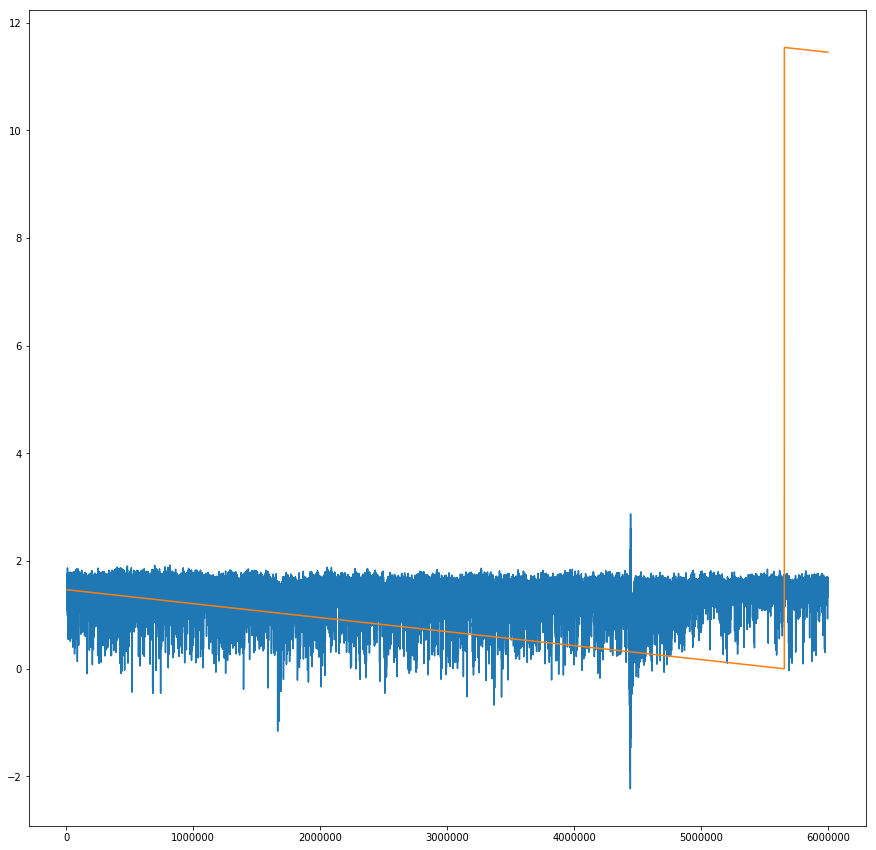

In [10]:
plt.figure(figsize=(15,15))
plt.plot(c.acoustic_data[100:])
plt.plot(c.time_to_failure[100:])

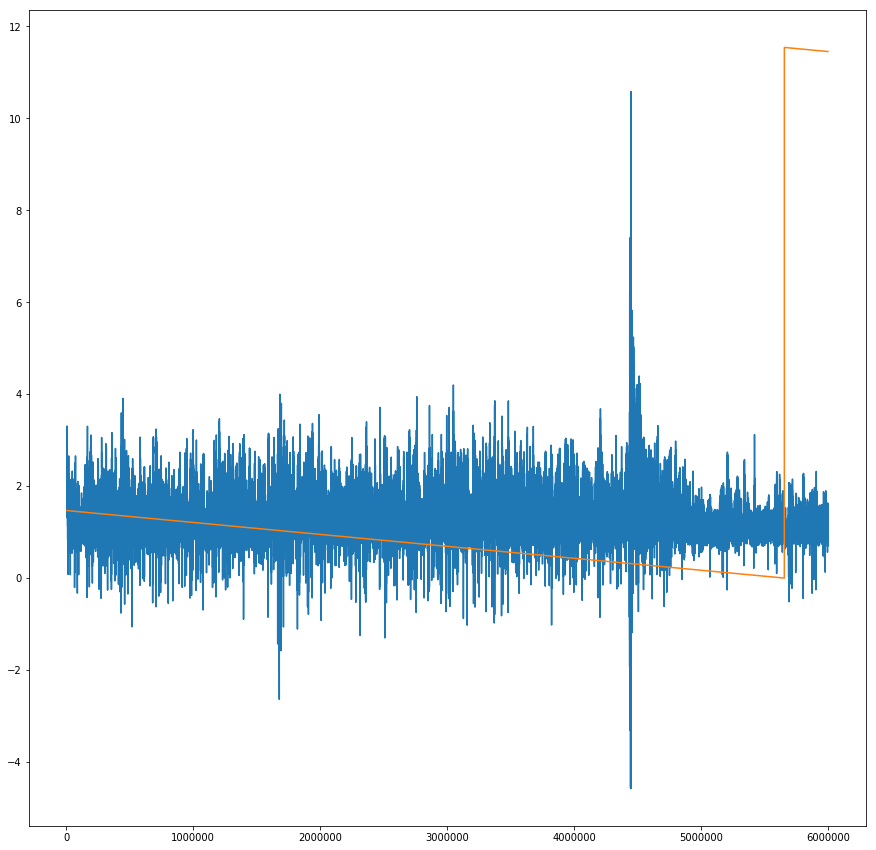

In [11]:
plt.figure(figsize=(15,15))
plt.plot(x[100:]*10)
plt.plot(c.time_to_failure[100:])